In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# dataset = pd.read_csv('Mall_Customers.csv')
# X = dataset.iloc[:, [3, 4]].values


dataset = pd.read_csv("./Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
X = dataset.iloc[:, [3, 4]]  
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## 肘部法 (Elbow Method) 找到最佳聚類數

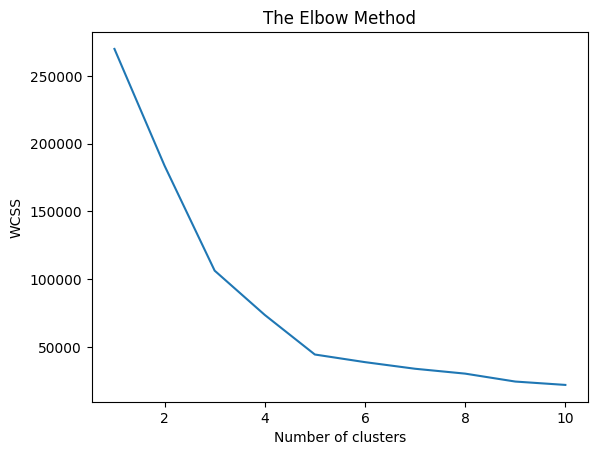

In [28]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# 找最趨緩的點

## Training the K-Means model

In [29]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

In [30]:
print(X.shape)  # 應該是一個 (n_samples, 2) 的 numpy 陣列
print(y_kmeans.shape)  # 應該是一個 (n_samples,) 的 numpy 陣列
print(type(X), type(y_kmeans))  # 檢查它們的類型是否正確

(200, 2)
(200,)
<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'>


## Visualising

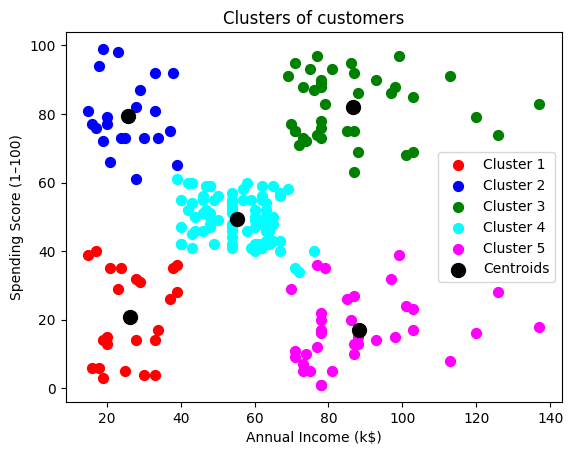

In [31]:
import matplotlib.pyplot as plt

# X要先由dataframe轉ndarray
X = X.to_numpy()
# 確保 X 是一個 2D 數組，y_kmeans 是 1D 整數數組
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=50, c='magenta', label='Cluster 5')

# 繪製群中心
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=100, c='black', label='Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()
